In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import seaborn as sns

train_df = pd.read_csv('C:/Users/HJS/응용수학/train2.csv')

In [2]:
train_df.isnull().sum()
#이제 상관관계만 알아보고 머신러닝을 통해 결과 예측만 하면됌.

Unnamed: 0        0
id                0
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64

In [3]:
train_df.dtypes

Unnamed: 0          int64
id                  int64
Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

In [4]:
train_df.head()

,Unnamed: 0,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1154,1155,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,830,831,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,1162,1163,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,599,600,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,1058,1059,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [2]:
train_df.drop(["Unnamed: 0","id"], axis=1, inplace = True)
train_df.head()
#쓸모없는 1,2열 삭제

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [6]:
train_df.dtypes

Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

In [7]:
kind_Gender = train_df['Gender'].unique()
print(kind_Gender)
#전복의 성별은 2개가 아니다.

['M' 'F' 'I']


<ipython-input-8-3feb5557eb42>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  train_df[kind_cols].hist(ax=ax)


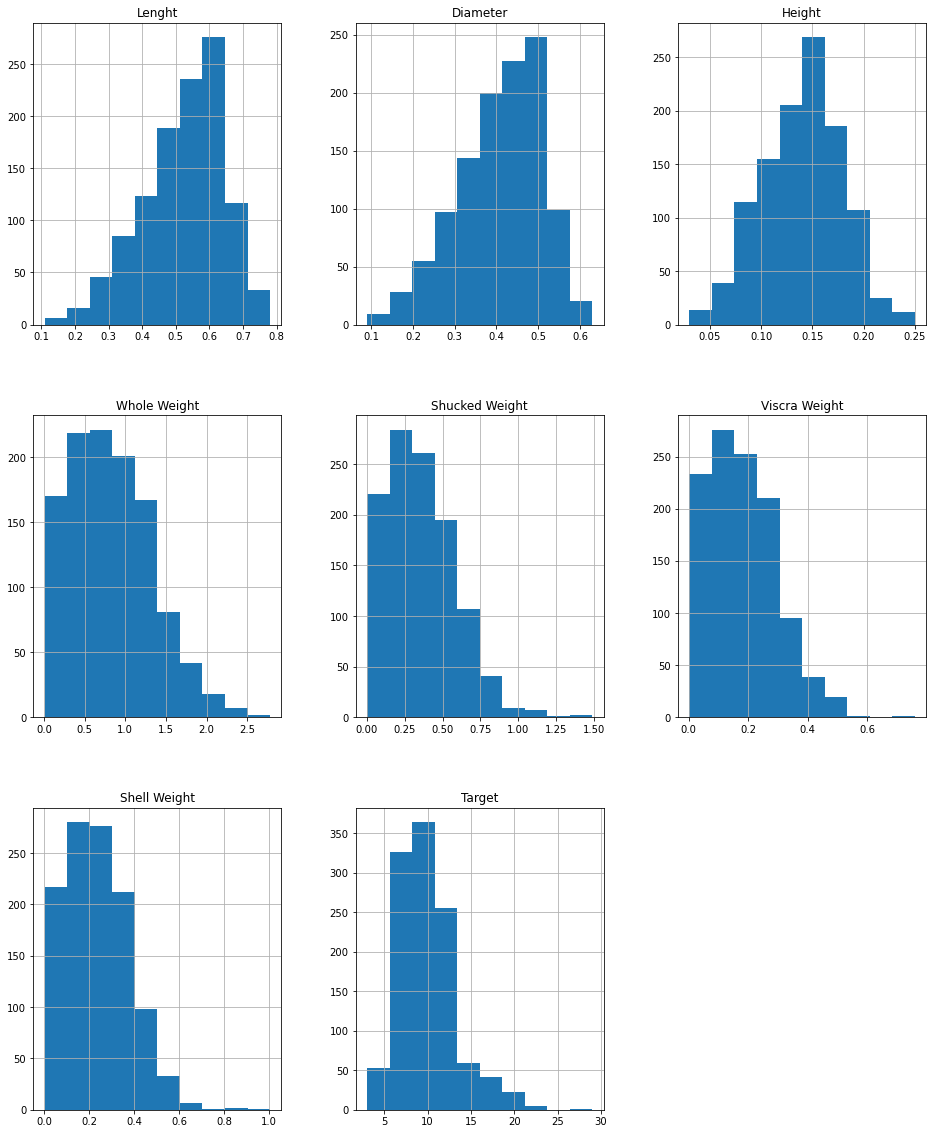

In [8]:
kind_cols = ['Lenght','Diameter','Height','Whole Weight','Shucked Weight', 'Viscra Weight','Shell Weight','Target']
fig = plt.figure(figsize=(16,20))
ax=fig.gca()

train_df[kind_cols].hist(ax=ax)
plt.show()

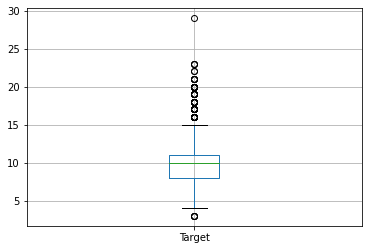

In [14]:
train_df.boxplot(column=['Target'])
plt.show()

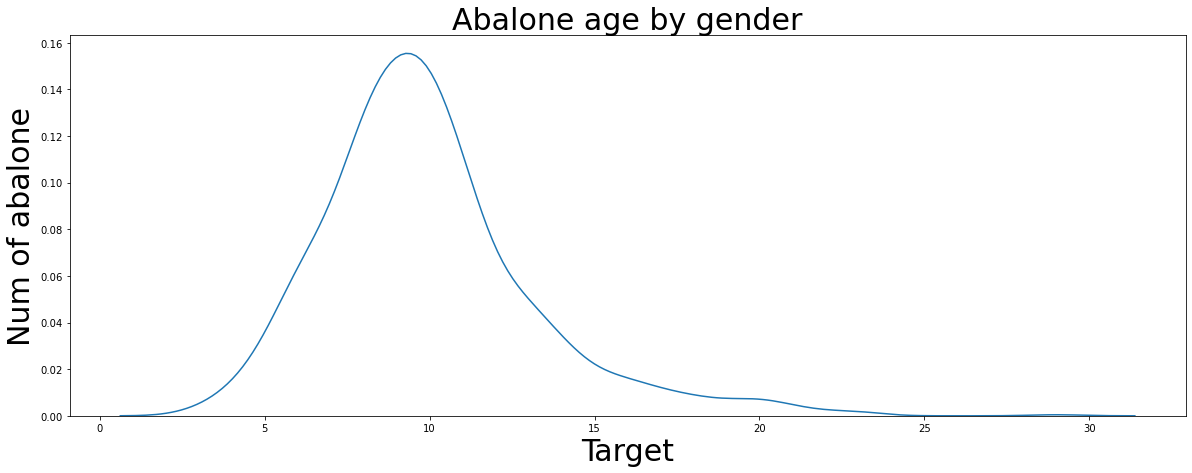

In [13]:
plt.rcParams['figure.figsize'] = [20,7]
sns.kdeplot('Target',data=train_df)
plt.title('Abalone age by gender', fontsize=30)
plt.xlabel('Target', fontsize=30)
plt.ylabel('Num of abalone', fontsize=30)
plt.show()
#전복의 평균 수명

C:\Users\HJS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


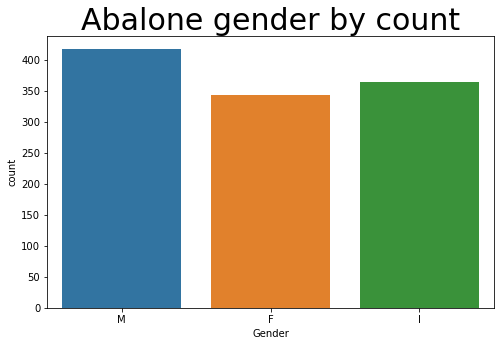

In [14]:
plt.rcParams['figure.figsize'] = [8,5]
sns.countplot('Gender', data=train_df)
plt.title('Abalone gender by count', fontsize=30)
plt.show()
# 각 성별이 치우치지 않고 이정도면 고르다고 할 수 있다.

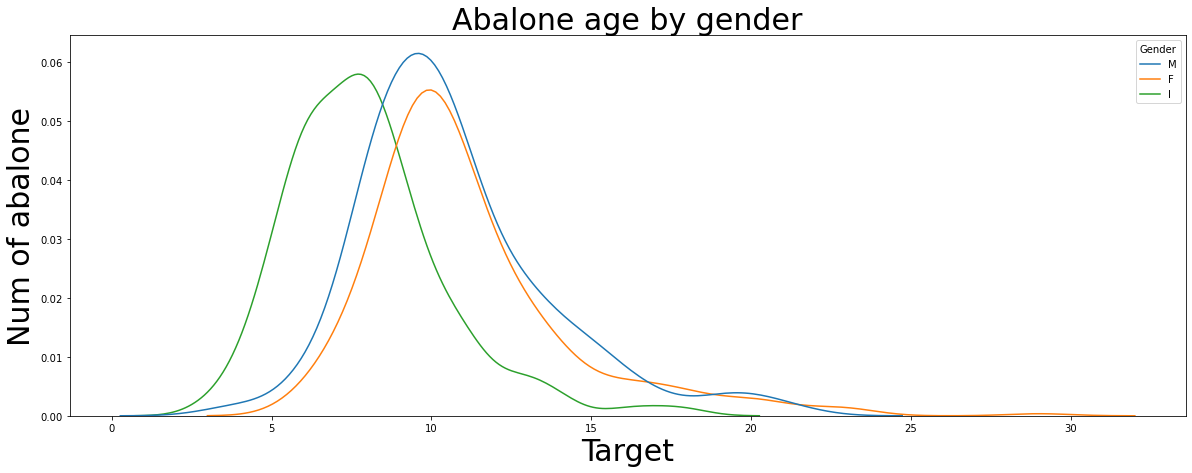

In [15]:
plt.rcParams['figure.figsize'] = [20,7]
sns.kdeplot('Target', hue='Gender', data=train_df)
plt.title('Abalone age by gender', fontsize=30)
plt.xlabel('Target', fontsize=30)
plt.ylabel('Num of abalone', fontsize=30)
plt.show()
# 성별에 따른 나이 분포
# I라는 성별은 확실하게 수명이 짧고, M과 F는 개체수의 차이를 비교해보면 차이가
# 그리 크지 않다는 것을 확인할 수 있다.

In [16]:
corr=train_df[kind_cols].corr(method='pearson')
corr
# 데이터들 끼리의 상관관계를 알아봤는데 알아보기 힘들다 따라서 시각화 한다.

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Lenght,1.000000,0.987336,0.905323,0.926032,0.895539,0.902617,0.897628,0.544288
Diameter,0.987336,1.000000,0.912596,0.928018,0.891400,0.901182,0.907122,0.569380
Height,0.905323,0.912596,1.000000,0.897565,0.840838,0.868035,0.902457,0.606440
Whole Weight,0.926032,0.928018,0.897565,1.000000,0.967998,0.966080,0.952435,0.536748
Shucked Weight,0.895539,0.891400,0.840838,0.967998,1.000000,0.931633,0.872618,0.418847
Viscra Weight,0.902617,0.901182,0.868035,0.966080,0.931633,1.000000,0.903189,0.494249
Shell Weight,0.897628,0.907122,0.902457,0.952435,0.872618,0.903189,1.000000,0.624020
Target,0.544288,0.569380,0.606440,0.536748,0.418847,0.494249,0.624020,1.000000


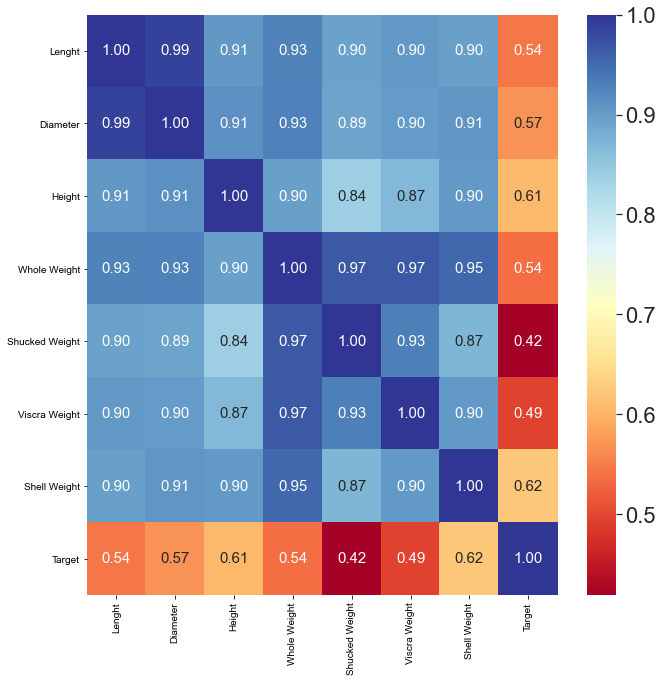

In [17]:
fig = plt.figure(figsize=(10,10))
ax=fig.gca()

sns.set(font_scale=2)
heatmap = sns.heatmap(corr.values, annot =True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = kind_cols, xticklabels = kind_cols, ax=ax, cmap="RdYlBu")
plt.tight_layout()
plt.show()
# 각 feature들 사이의 상관관계를 히트맵으로 구성해봤다.
# 대부분이 상관관계가 높지만, 유독 Target과 낮은것을 알 수 있다.
# 그래서 Target과의 상관관계표를 다시 만들었다.

In [15]:
train_corr=train_df
corr28=train_corr.corr(method='pearson')
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target'].sort_values(ascending=False), columns=['Target'])
df_temp28.style.background_gradient(cmap='viridis')

# 타겟을 기준으로 다른 feature들과의 상관관계 표
# 

,Target
Target,1.000000
Shell Weight,0.624020
Height,0.606440
Diameter,0.569380
Lenght,0.544288
Whole Weight,0.536748
Viscra Weight,0.494249
Shucked Weight,0.418847


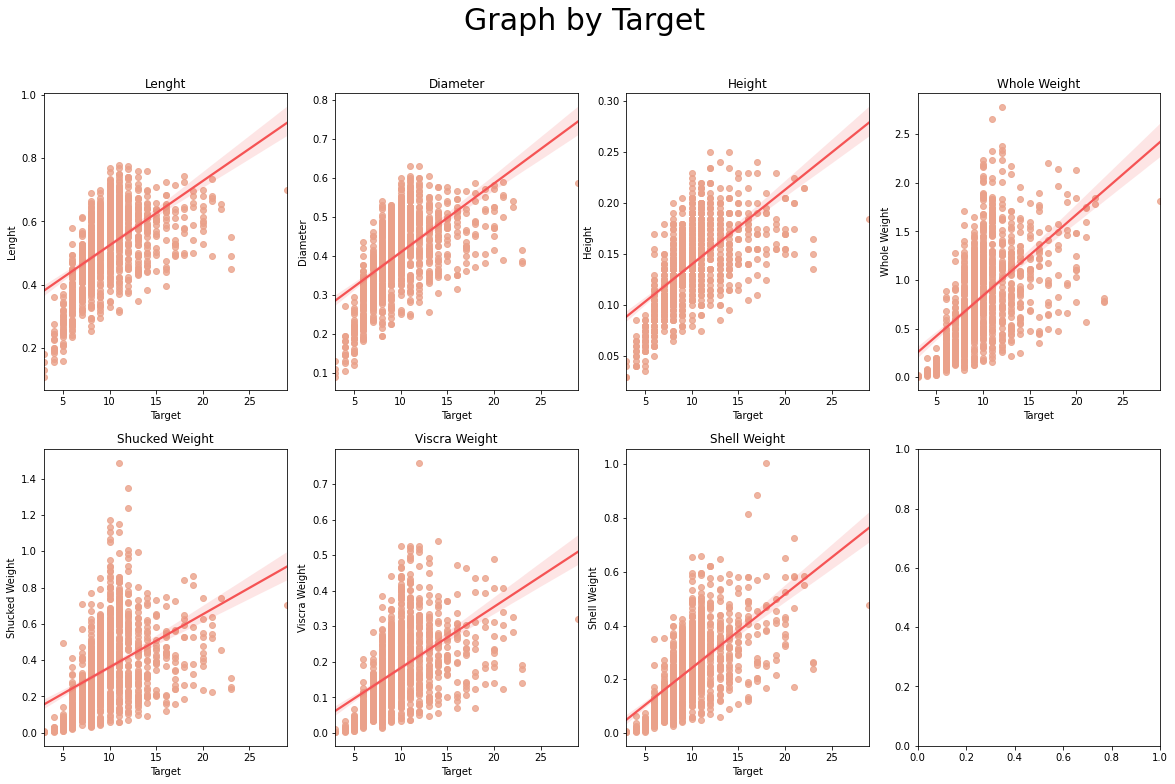

In [6]:
def visualize(axx, yfield):
  sns.regplot(x='Target', y=yfield, data=train_df,  color='#eaa18a', line_kws=  {'color': '#f55354'} , ax = axx) # regplot을 이용하여 추세선과 산점도 그래프를 그려줍니다.
  axx.set_title(yfield)

figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20,12)
figure.suptitle('Graph by Target', fontsize=30)
for i in range(len(train_df.columns[1:-1])):
  visualize(eval(f'ax{i+1}'), train_df.columns[i+1])

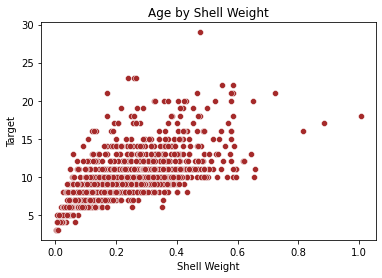

<Figure size 72x72 with 0 Axes>

In [25]:
sns.scatterplot(data=train_df, x='Shell Weight',y='Target', markers='o', color='brown', alpha=1)
plt.title('Age by Shell Weight')
plt.figure(figsize=(1,1))
plt.show()

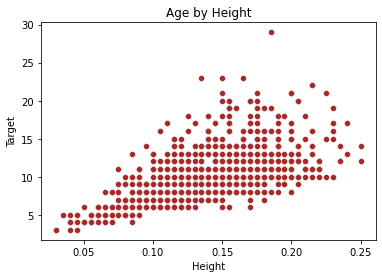

<Figure size 72x72 with 0 Axes>

In [22]:
sns.scatterplot(data=train_df, x='Height',y='Target', markers='o', color='brown', alpha=1)
plt.title('Age by Height')
plt.figure(figsize=(1,1))
plt.show()

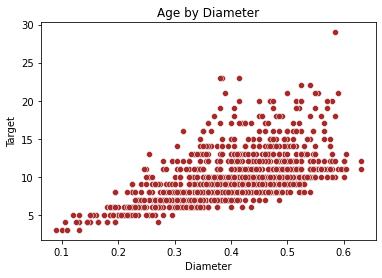

<Figure size 72x72 with 0 Axes>

In [26]:
sns.scatterplot(data=train_df, x='Diameter',y='Target', markers='o', color='brown', alpha=1)
plt.title('Age by Diameter')
plt.figure(figsize=(1,1))
plt.show()

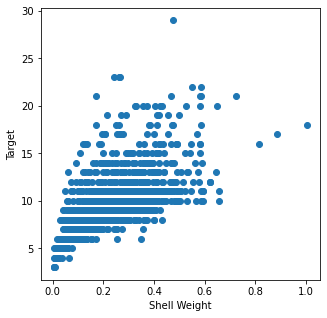

In [17]:
x=train_df['Shell Weight']
y=train_df['Target']
plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.xlabel("Shell Weight",fontsize=10)
plt.ylabel("Target",fontsize=10)
plt.show()


In [5]:
train_df2=train_df

In [61]:
Whole_xVS=train_df['Whole Weight']-train_df['Viscra Weight']-train_df['Shucked Weight']
Height_Shell=train_df['Shell Weight']+train_df['Height']
SVs=train_df['Shell Weight']+train_df['Viscra Weight']+train_df['Shucked Weight']
SDL=train_df['Shell Weight']+train_df['Diameter']+train_df['Lenght']
DL=train_df['Diameter']+train_df['Lenght']
SVs_Whole_xVS=train_df2['SVs']+train_df2['Whole_xVS']
Shell_xS=train_df['Shell Weight']-train_df['Shucked Weight']
Sehll_dS=train_df['Shell Weight']/train_df['Shucked Weight']
SSHD=2*train_df['Shell Weight']+train_df['Diameter']+train_df["Height"]
Shell_xVS=train_df['Shell Weight']-train_df['Viscra Weight']+train_df['Shucked Weight']
Weight2_xVS=train_df['Whole Weight']+train_df['Whole Weight']-train_df['Viscra Weight']-train_df['Shucked Weight']
WS_xVS=train_df['Whole Weight']+train_df['Shell Weight']+train_df['Whole Weight']-train_df['Viscra Weight']-train_df['Shucked Weight']-train_df['Viscra Weight']-train_df['Shucked Weight']
All_in=train_df['Shell Weight']+train_df['Height']+train_df['Diameter']+train_df['Lenght']+train_df['Whole Weight']+train_df['Viscra Weight']+train_df['Shucked Weight']
Weight_VS=train_df['Viscra Weight']+train_df['Shucked Weight']
Whole_xS=train_df['Whole Weight']-train_df['Shucked Weight']
Whole_xV=train_df['Whole Weight']-train_df['Viscra Weight']
Shell_xS=train_df['Shell Weight']-train_df['Shucked Weight']
Weight_xSVS=train_df['Whole Weight']-train_df2['Weight_SVS']
Whole_xShell=train_df['Whole Weight']-train_df['Shell Weight']
Lenght_Height=train_df['Height']+train_df['Lenght']
Lenght_xHeight=train_df['Height']-train_df['Lenght']
Whole_xLH=train_df['Whole Weight']-train_df2['Height_Lenght']
Shell_xLH=train_df['Shell Weight']-train_df2['Height_Lenght']
#임의의 Feature를 만들어봄

KeyError: 'Weight_SVS'

In [60]:
train_corr=train_df.drop(columns=['Gender','id'],axis=1)
train_df2=pd.concat([train_df2,SSHD],axis=1)
train_corr=train_df2
corr28=train_corr.corr(method='pearson')
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target'].sort_values(ascending=False), columns=['Target'])
df_temp28.style.background_gradient(cmap='viridis')
# 내가만든 Feature가 더 높은 상관관계를 갖는다!!!

,Target
Target,1.000000
Whole_xVS,0.642742
Height_Shell,0.630719
Shell Weight,0.624020
SSHD,0.623787
Height,0.606440
SDL,0.597227
Diameter,0.569380
SVs_Whole_xVS,0.560625
DL,0.557412


In [59]:
train_df2=train_df2.rename(columns={0:"SSHD"})
train_df2

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Lenght_xHeight,Whole_xVS,Height_Shell,SVs,SDL,DL,SVs_Whole_xVS,Shell_xVS,Shell_xS,Sehll_dS,SSHD
0,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14,-0.390,0.3405,0.4750,0.8940,1.3450,1.050,1.2345,0.4940,-0.1040,0.739348,1.250
1,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9,-0.425,0.2310,0.3325,0.9080,1.1825,0.985,1.1390,0.5050,-0.3115,0.388016,0.955
2,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9,-0.505,0.3405,0.4550,1.0075,1.4700,1.165,1.3480,0.5615,-0.1745,0.636079,1.270
3,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6,-0.260,0.0385,0.0950,0.1510,0.5800,0.535,0.1895,0.0740,-0.0225,0.666667,0.365
4,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9,-0.235,0.0505,0.1190,0.1230,0.5790,0.535,0.1735,0.0560,-0.0015,0.967033,0.388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,F,0.565,0.450,0.185,0.9285,0.3020,0.1805,0.2650,12,-0.380,0.4460,0.4500,0.7475,1.2800,1.015,1.1935,0.3865,-0.0370,0.877483,1.165
1123,F,0.575,0.450,0.160,1.0680,0.5560,0.2140,0.2575,10,-0.415,0.2980,0.4175,1.0275,1.2825,1.025,1.3255,0.5995,-0.2985,0.463129,1.125
1124,I,0.580,0.435,0.150,0.8915,0.3630,0.1925,0.2515,6,-0.430,0.3360,0.4015,0.8070,1.2665,1.015,1.1430,0.4220,-0.1115,0.692837,1.088
1125,F,0.590,0.455,0.150,0.9760,0.4650,0.2055,0.2765,10,-0.440,0.3055,0.4265,0.9470,1.3215,1.045,1.2525,0.5360,-0.1885,0.594624,1.158


In [ ]:
train_df2=train_df2.drop([0],axis=1)
train_df2

In [ ]:
# 여기서부터는 성별별로 나눠서 진행해봄

In [49]:
# 성별중 M,I,F 를 나눠서 진행해봄.
drop_M = train_df[train_df['Gender']=='M'].index
drop_F = train_df[train_df['Gender']=='F'].index
drop_I = train_df[train_df['Gender']=='I'].index

In [52]:
train_df_F=train_df.drop(drop_M)
train_df_F=train_df_F.drop(drop_I)
train_df_F

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
2,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
5,F,0.565,0.400,0.130,0.6975,0.3075,0.1665,0.1800,8
8,F,0.645,0.510,0.180,1.6195,0.7815,0.3220,0.4675,12
13,F,0.670,0.540,0.195,1.6190,0.7400,0.3305,0.4650,11
14,F,0.330,0.260,0.080,0.2000,0.0625,0.0500,0.0700,9
...,...,...,...,...,...,...,...,...,...
1115,F,0.545,0.440,0.135,0.9185,0.4290,0.2015,0.2375,10
1119,F,0.575,0.480,0.150,0.8745,0.3750,0.1930,0.2900,12
1122,F,0.565,0.450,0.185,0.9285,0.3020,0.1805,0.2650,12
1123,F,0.575,0.450,0.160,1.0680,0.5560,0.2140,0.2575,10


In [53]:
    train_df_M=train_df.drop(drop_F)
train_df_M=train_df_M.drop(drop_I)
train_df_M

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
4,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9
7,M,0.655,0.515,0.200,1.3730,0.4430,0.3375,0.4900,16
10,M,0.475,0.370,0.125,0.6550,0.2660,0.1725,0.1850,10
...,...,...,...,...,...,...,...,...,...
1113,M,0.610,0.480,0.150,1.2000,0.5600,0.2455,0.2800,14
1114,M,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
1116,M,0.765,0.600,0.220,2.3020,1.0070,0.5090,0.6205,12
1117,M,0.485,0.370,0.140,0.5725,0.2040,0.1415,0.1750,10


In [54]:
train_df_I=train_df.drop(drop_M)
train_df_I=train_df_I.drop(drop_F)
train_df_I

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
3,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
6,I,0.525,0.400,0.145,0.6095,0.2480,0.1590,0.1750,9
9,I,0.370,0.280,0.085,0.1980,0.0805,0.0455,0.0580,5
11,I,0.565,0.440,0.175,0.8735,0.4140,0.2100,0.2100,11
12,I,0.515,0.350,0.105,0.4745,0.2130,0.1230,0.1275,10
...,...,...,...,...,...,...,...,...,...
1112,I,0.425,0.380,0.105,0.3265,0.1285,0.0785,0.1000,10
1118,I,0.295,0.225,0.080,0.1240,0.0485,0.0320,0.0400,9
1120,I,0.500,0.375,0.120,0.5290,0.2235,0.1230,0.1600,8
1124,I,0.580,0.435,0.150,0.8915,0.3630,0.1925,0.2515,6


In [118]:
Whole_xVS=train_df_I['Whole Weight']-train_df_I['Viscra Weight']-train_df_I['Shucked Weight']
Height_Shell=train_df_I['Height']+train_df_I['Shell Weight']
SHD=train_df_I['Height']+train_df_I['Shell Weight']+train_df_I['Diameter']
SSHD=train_df_I['Height']+2*train_df_I['Shell Weight']+train_df_I['Diameter']
m3SHD=train_df_I['Height']+3*train_df_I['Shell Weight']+train_df_I['Diameter']
m2S2HD=2*train_df_I['Height']+3*train_df_I['Shell Weight']+train_df_I['Diameter']
SHDL=train_df_I['Height']+train_df_I['Shell Weight']+train_df_I['Diameter']+train_df_I['Lenght']
WS_xVS=train_df_I['Whole Weight']+train_df_I['Shell Weight']+train_df_I['Whole Weight']-train_df_I['Viscra Weight']-train_df_I['Shucked Weight']-train_df_I['Viscra Weight']-train_df_I['Shucked Weight']
Height_dShell=train_df_I['Height']/train_df_I['Shell Weight']
Shell_dViscra=train_df_I['Shell Weight']/train_df_I['Viscra Weight']
SDL=train_df_I['Shell Weight']+train_df_I['Diameter']+train_df_I['Lenght']
SW=train_df_I['Shell Weight']+train_df_I['Whole Weight']
DL=train_df_I['Diameter']+train_df_I['Lenght']
#임의의 Feature를 만들어봄

In [147]:
#train_df_I=pd.concat([train_df_I,SW],axis=1)
train_corr=train_df_I
corr28=train_corr.corr(method='pearson')
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target-I'].sort_values(ascending=False), columns=['Target-I'])
df_temp28.style.background_gradient(cmap='viridis')

,Target-I
Target-I,1.000000
m2S2HD,0.733674
SSHD,0.733228
Height_Shell,0.731787
Shell Weight,0.720638
SDL,0.720173
Height,0.714061
Diameter,0.701537
Whole_xVS,0.700556
SW,0.699199


In [144]:
train_df_I=train_df_I.rename(columns={"Target":"Target-I"})
train_df_I

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target-I,Whole_xVS,Height_Shell,SHD,SSHD,m2S2HD,SDL,SW,DL
3,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6,0.0385,0.0950,0.000506,0.365,0.4600,0.5800,0.1895,0.535
6,I,0.525,0.400,0.145,0.6095,0.2480,0.1590,0.1750,9,0.2025,0.3200,0.010150,0.895,1.2150,1.1000,0.7845,0.925
9,I,0.370,0.280,0.085,0.1980,0.0805,0.0455,0.0580,5,0.0720,0.1430,0.001380,0.481,0.6240,0.7080,0.2560,0.650
11,I,0.565,0.440,0.175,0.8735,0.4140,0.2100,0.2100,11,0.2495,0.3850,0.016170,1.035,1.4200,1.2150,1.0835,1.005
12,I,0.515,0.350,0.105,0.4745,0.2130,0.1230,0.1275,10,0.1385,0.2325,0.004686,0.710,0.9425,0.9925,0.6020,0.865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,I,0.425,0.380,0.105,0.3265,0.1285,0.0785,0.1000,10,0.1195,0.2050,0.003990,0.685,0.8900,0.9050,0.4265,0.805
1118,I,0.295,0.225,0.080,0.1240,0.0485,0.0320,0.0400,9,0.0435,0.1200,0.000720,0.385,0.5050,0.5600,0.1640,0.520
1120,I,0.500,0.375,0.120,0.5290,0.2235,0.1230,0.1600,8,0.1825,0.2800,0.007200,0.815,1.0950,1.0350,0.6890,0.875
1124,I,0.580,0.435,0.150,0.8915,0.3630,0.1925,0.2515,6,0.3360,0.4015,0.016410,1.088,1.4895,1.2665,1.1430,1.015


In [194]:
train_df_I=train_df_I.drop([0],axis=1)
train_df_I

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Whole_xVS,Height_Shell,Height_mShell,pSHD,WS_xVS
3,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6,0.0385,0.0950,0.002250,0.3200,0.1220
6,I,0.525,0.400,0.145,0.6095,0.2480,0.1590,0.1750,9,0.2025,0.3200,0.025375,0.7200,0.5800
9,I,0.370,0.280,0.085,0.1980,0.0805,0.0455,0.0580,5,0.0720,0.1430,0.004930,0.4230,0.2020
11,I,0.565,0.440,0.175,0.8735,0.4140,0.2100,0.2100,11,0.2495,0.3850,0.036750,0.8250,0.7090
12,I,0.515,0.350,0.105,0.4745,0.2130,0.1230,0.1275,10,0.1385,0.2325,0.013388,0.5825,0.4045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,I,0.425,0.380,0.105,0.3265,0.1285,0.0785,0.1000,10,0.1195,0.2050,0.010500,0.5850,0.3390
1118,I,0.295,0.225,0.080,0.1240,0.0485,0.0320,0.0400,9,0.0435,0.1200,0.003200,0.3450,0.1270
1120,I,0.500,0.375,0.120,0.5290,0.2235,0.1230,0.1600,8,0.1825,0.2800,0.019200,0.6550,0.5250
1124,I,0.580,0.435,0.150,0.8915,0.3630,0.1925,0.2515,6,0.3360,0.4015,0.037725,0.8365,0.9235


In [63]:
## 이제 남자여자 정도만 해보면 끝

In [136]:
Whole_xVS=train_df_M['Whole Weight']-train_df_M['Viscra Weight']-train_df_M['Shucked Weight']
Height_Shell=train_df_M['Height']+train_df_M['Shell Weight']
SHD=train_df_M['Shell Weight']+train_df_M['Height']+train_df_M['Diameter']
SSHD=2*train_df_M['Shell Weight']+train_df_M['Height']+train_df_M['Diameter']
SDL=train_df_M['Shell Weight']+train_df_M['Diameter']+train_df_M['Lenght']
DL=train_df_M['Diameter']+train_df_M['Lenght']
SW=train_df_M['Shell Weight']+train_df_M['Whole Weight']
m2S2HD=2*train_df_M['Height']+3*train_df_M['Shell Weight']+train_df_M['Diameter']

In [139]:
train_df_M=pd.concat([train_df_M,m2S2HD],axis=1)
train_corr=train_df_M
corr28=train_corr.corr(method='pearson')
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target-M'].sort_values(ascending=False), columns=['Target-M'])
df_temp28.style.background_gradient(cmap='viridis')

,Target-M
Target-M,1.000000
Whole_xVS,0.541368
Height_Shell,0.519784
Shell Weight,0.512072
m2S2HD,0.507913
Height,0.504011
SSHD,0.502080
SHD,0.493661
SDL,0.458409
SW,0.421133


In [138]:
train_df_M=train_df_M.rename(columns={0:"m2S2HD"})
train_df_M

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target-M,Whole_xVS,Height_Shell,SHD,SSHD,SW,DL,SDL,m2S2HD
0,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14,0.3405,0.4750,0.9550,1.250,1.2345,1.050,1.3450,1.7250
1,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9,0.2310,0.3325,0.7575,0.955,1.1390,0.985,1.1825,1.2875
4,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9,0.0505,0.1190,0.3440,0.388,0.1735,0.535,0.5790,0.5070
7,M,0.655,0.515,0.200,1.3730,0.4430,0.3375,0.4900,16,0.5925,0.6900,1.2050,1.695,1.8630,1.170,1.6600,2.3850
10,M,0.475,0.370,0.125,0.6550,0.2660,0.1725,0.1850,10,0.2165,0.3100,0.6800,0.865,0.8400,0.845,1.0300,1.1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,M,0.610,0.480,0.150,1.2000,0.5600,0.2455,0.2800,14,0.3945,0.4300,0.9100,1.190,1.4800,1.090,1.3700,1.6200
1114,M,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10,0.2440,0.3665,0.7915,1.008,1.0480,0.975,1.1915,1.3745
1116,M,0.765,0.600,0.220,2.3020,1.0070,0.5090,0.6205,12,0.7860,0.8405,1.4405,2.061,2.9225,1.365,1.9855,2.9015
1117,M,0.485,0.370,0.140,0.5725,0.2040,0.1415,0.1750,10,0.2270,0.3150,0.6850,0.860,0.7475,0.855,1.0300,1.1750


In [140]:
Whole_xVS=train_df_F['Whole Weight']-train_df_F['Viscra Weight']-train_df_F['Shucked Weight']
Height_Shell=train_df_F['Height']+train_df_F['Shell Weight']
SHD=train_df_F['Shell Weight']+train_df_F['Height']+train_df_F['Diameter']
SSHD=2*train_df_F['Shell Weight']+train_df_F['Height']+train_df_F['Diameter']
SDL=train_df_F['Shell Weight']+train_df_F['Diameter']+train_df_F['Lenght']
DL=train_df_F['Diameter']+train_df_F['Lenght']
SW=train_df_F['Shell Weight']+train_df_F['Whole Weight']
m2S2HD=2*train_df_F['Height']+3*train_df_F['Shell Weight']+train_df_F['Diameter']

In [143]:
#train_df_F=pd.concat([train_df_F,m2S2HD],axis=1)
train_corr=train_df_F
corr28=train_corr.corr(method='pearson')
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target-F'].sort_values(ascending=False), columns=['Target-F'])
df_temp28.style.background_gradient(cmap='viridis')

,Target-F
Target-F,1.000000
Whole_xVS,0.463105
Shell Weight,0.411585
Height_Shell,0.401863
m2S2HD,0.388893
SSHD,0.382497
SHD,0.362225
SDL,0.316983
SW,0.301492
Height,0.299905


In [142]:
train_df_F=train_df_F.rename(columns={0:"m2S2HD"})
train_df_F

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target-F,Whole_xVS,Height_Shell,SHD,SSHD,DL,SW,SDL,m2S2HD
2,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9,0.3405,0.4550,0.9650,1.270,1.165,1.3480,1.4700,1.7250
5,F,0.565,0.400,0.130,0.6975,0.3075,0.1665,0.1800,8,0.2235,0.3100,0.7100,0.890,0.965,0.8775,1.1450,1.2000
8,F,0.645,0.510,0.180,1.6195,0.7815,0.3220,0.4675,12,0.5160,0.6475,1.1575,1.625,1.155,2.0870,1.6225,2.2725
13,F,0.670,0.540,0.195,1.6190,0.7400,0.3305,0.4650,11,0.5485,0.6600,1.2000,1.665,1.210,2.0840,1.6750,2.3250
14,F,0.330,0.260,0.080,0.2000,0.0625,0.0500,0.0700,9,0.0875,0.1500,0.4100,0.480,0.590,0.2700,0.6600,0.6300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,F,0.545,0.440,0.135,0.9185,0.4290,0.2015,0.2375,10,0.2880,0.3725,0.8125,1.050,0.985,1.1560,1.2225,1.4225
1119,F,0.575,0.480,0.150,0.8745,0.3750,0.1930,0.2900,12,0.3065,0.4400,0.9200,1.210,1.055,1.1645,1.3450,1.6500
1122,F,0.565,0.450,0.185,0.9285,0.3020,0.1805,0.2650,12,0.4460,0.4500,0.9000,1.165,1.015,1.1935,1.2800,1.6150
1123,F,0.575,0.450,0.160,1.0680,0.5560,0.2140,0.2575,10,0.2980,0.4175,0.8675,1.125,1.025,1.3255,1.2825,1.5425
